In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
PATH = "../dados/brutos/arquivo_geral_covid_brasil.csv"

In [3]:
data_df = pd.read_csv(PATH, sep=";")

In [4]:
data_df["data"] = pd.to_datetime(data_df["data"])
data_df.sort_values(by="data", inplace=True)

In [5]:
data_df.tail()

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
2276,Sul,RS,2020-05-07,79,2129,3,90
395,Norte,RR,2020-05-07,88,1020,1,14
1286,Nordeste,PE,2020-05-07,943,10824,42,845
890,Nordeste,PI,2020-05-07,102,1051,5,35
2672,Centro-Oeste,DF,2020-05-07,352,2258,1,35


# Análise do Brasil

In [6]:
brasil_df = data_df.groupby("data").sum()

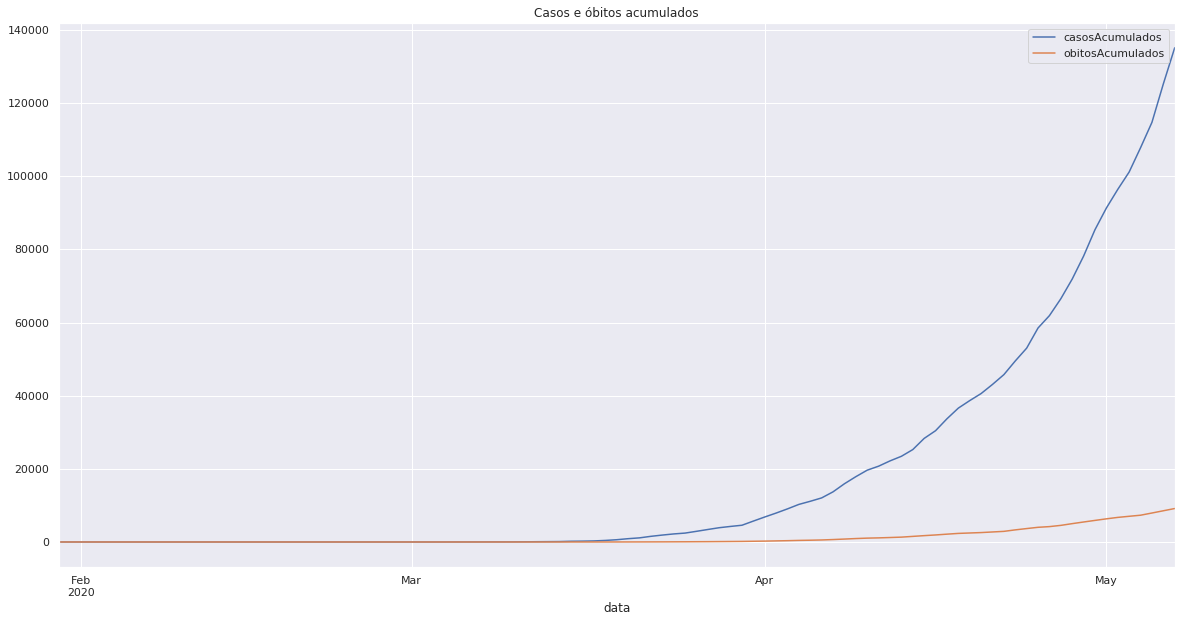

In [7]:
brasil_df[["casosAcumulados", "obitosAcumulados"]].plot(title="Casos e óbitos acumulados")

# Análise de regiões

In [8]:

regioes_df = data_df.groupby(["data","regiao"]).sum()
regioes_df.tail()

casosNovos  casosAcumulados  obitosNovos  \
data       regiao                                                   
2020-05-07 Centro-Oeste         416             4013            1   
           Nordeste            3926            42157          145   
           Norte               1902            21377           86   
           Sudeste             3371            60692          369   
           Sul                  273             6867           10   

                         obitosAcumulados  
data       regiao                          
2020-05-07 Centro-Oeste               102  
           Nordeste                  2553  
           Norte                     1373  
           Sudeste                   4861  
           Sul                        257

In [9]:
# Indexando apenas pela data
regioes_df = regioes_df.reset_index().set_index("data")
regioes_df

,regiao,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
data,,,,,
2020-01-30,Centro-Oeste,0,0,0,0
2020-01-30,Nordeste,0,0,0,0
2020-01-30,Norte,0,0,0,0
2020-01-30,Sudeste,0,0,0,0
2020-01-30,Sul,0,0,0,0
...,...,...,...,...,...
2020-05-07,Centro-Oeste,416,4013,1,102
2020-05-07,Nordeste,3926,42157,145,2553
2020-05-07,Norte,1902,21377,86,1373


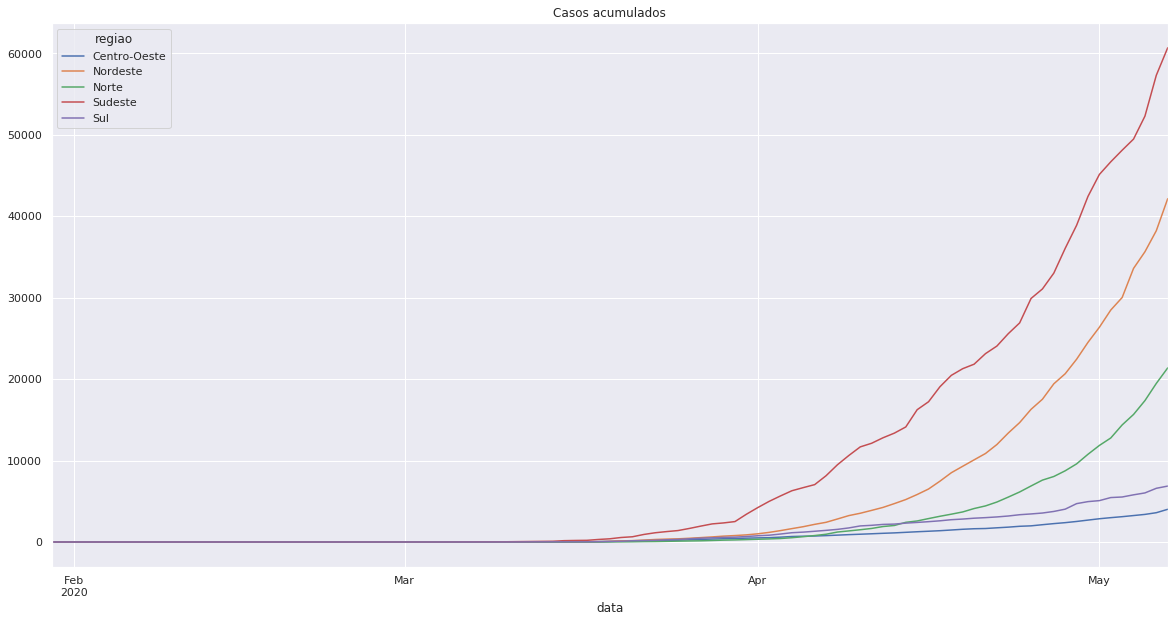

In [10]:
final_reg_df = regioes_df.pivot(columns="regiao")
final_reg_df["casosAcumulados"].plot(title="Casos acumulados")

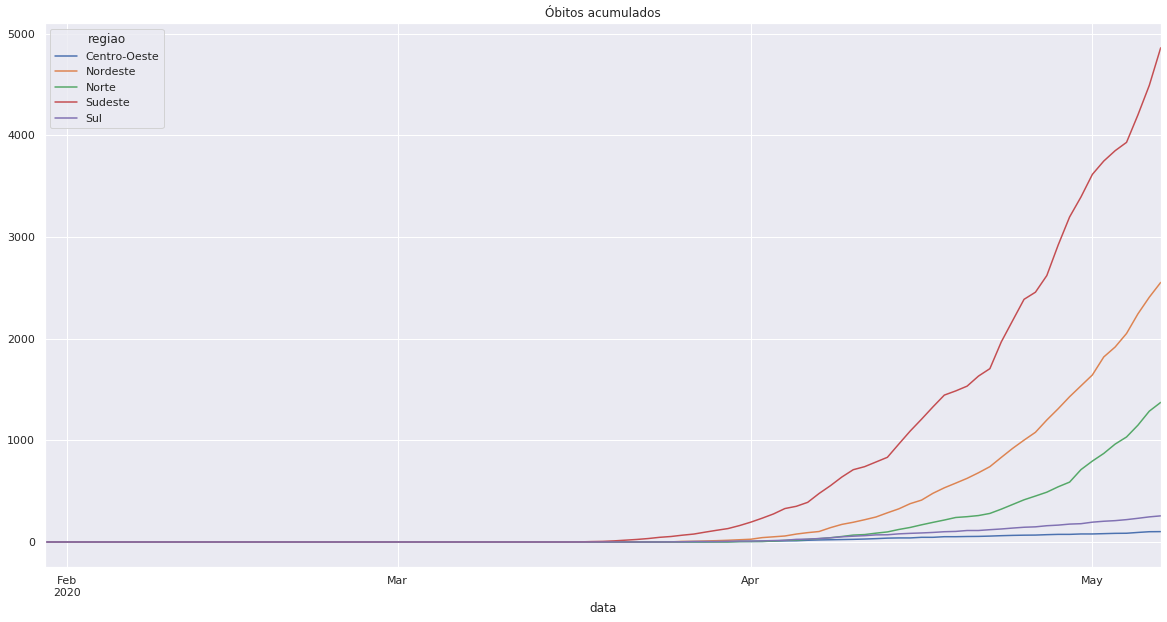

In [11]:
final_reg_df["obitosAcumulados"].plot(title="Óbitos acumulados")

# Análise de estados

In [12]:
estados_df = data_df.set_index("data").pivot(columns="estado")

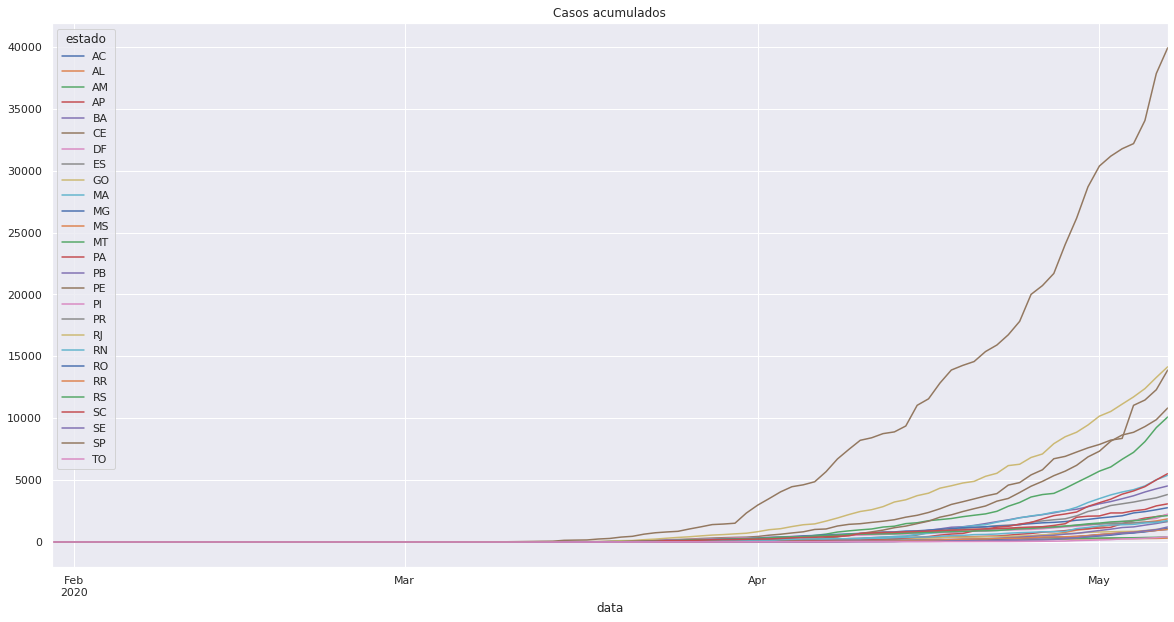

In [13]:
estados_df["casosAcumulados"].plot(title="Casos acumulados")

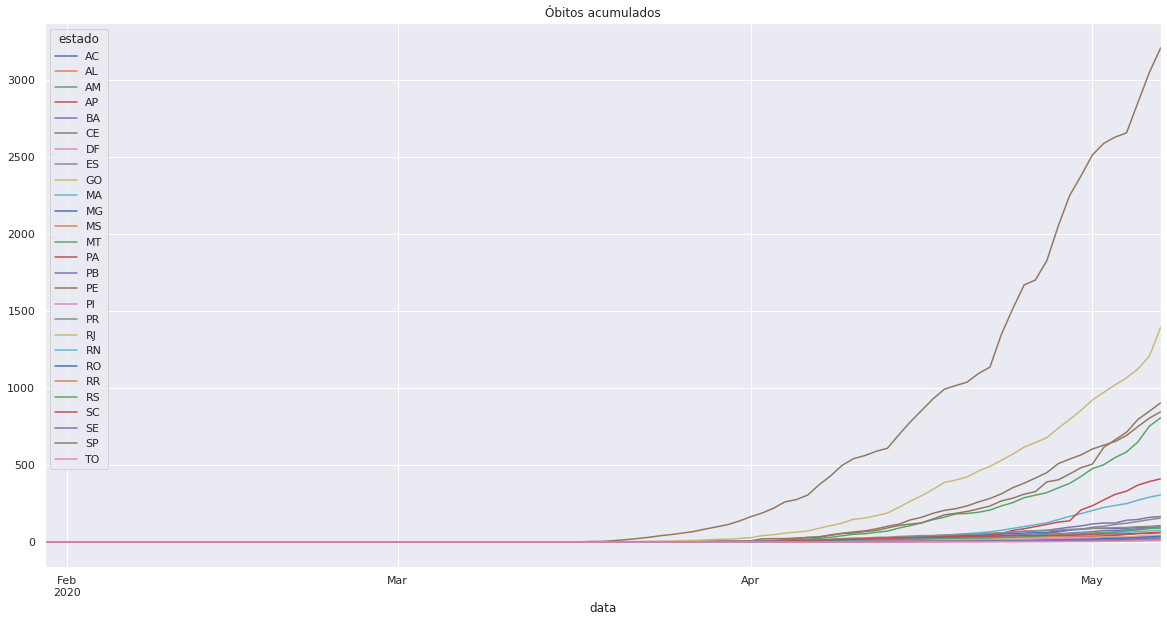

In [14]:
estados_df["obitosAcumulados"].plot(title="Óbitos acumulados")


# Visualização dos dados mais recentes

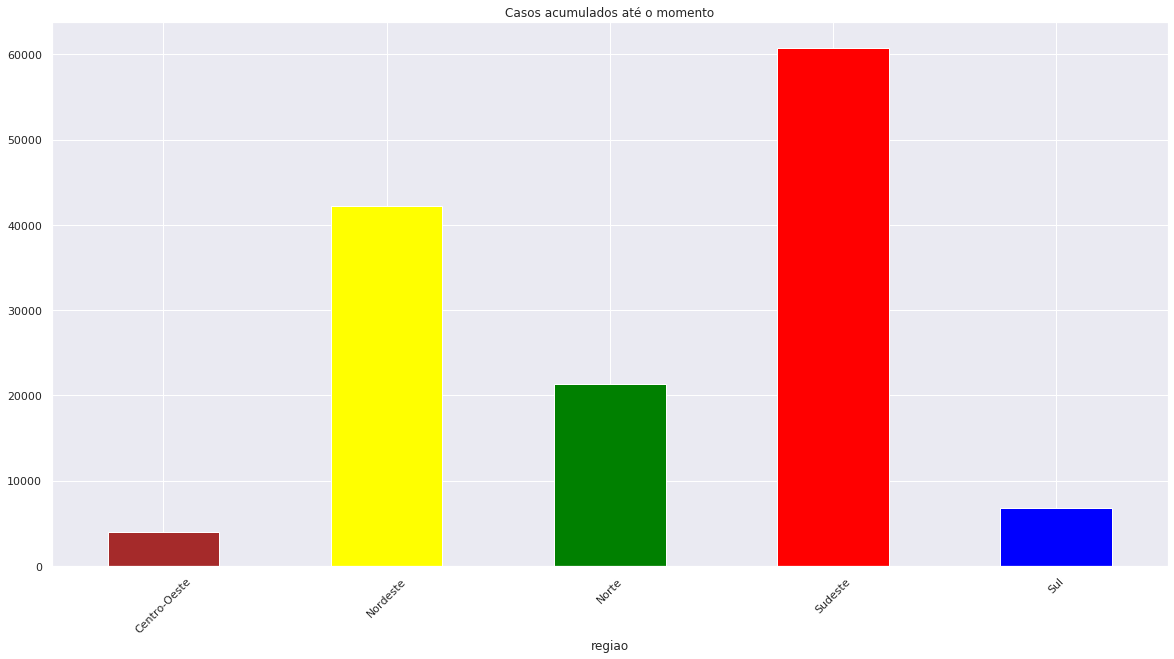

In [15]:
final_reg_df.iloc[-1]["casosAcumulados"].plot.bar(rot=45, color=["brown", "yellow", "green", "red", "blue"], title="Casos acumulados até o momento")

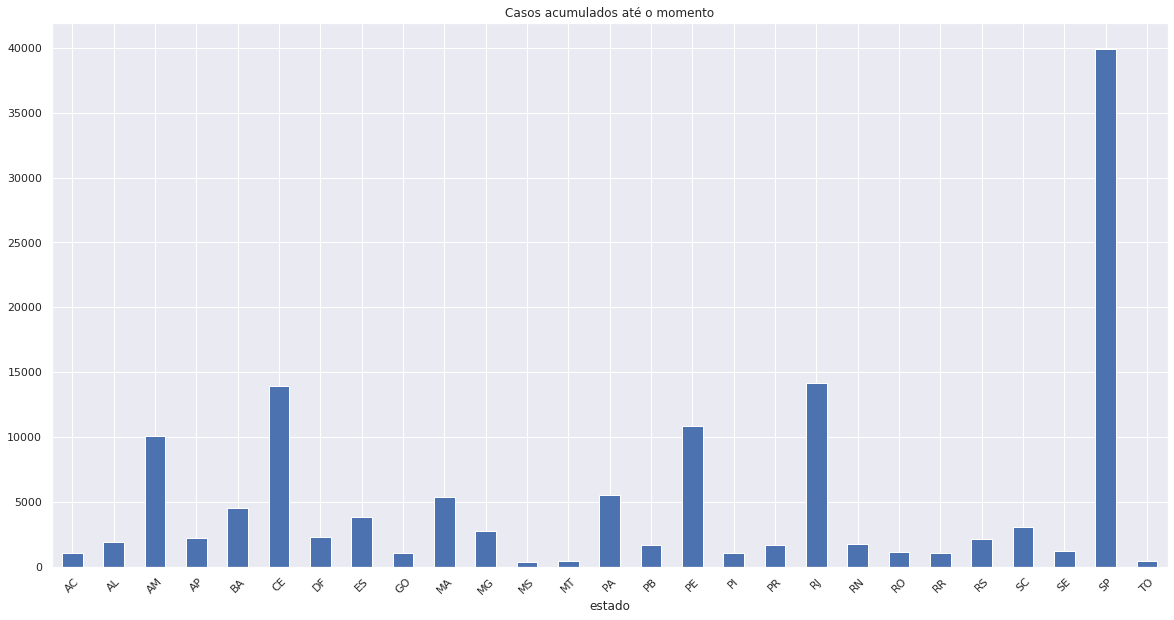

In [16]:
estados_df.iloc[-1]["casosAcumulados"].plot.bar(rot=45, title="Casos acumulados até o momento")

In [17]:
# TODO exportar para tratados como planilha excel